In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# loading linear algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
train_df = pd.read_csv('Resources/2019loans.csv')
test_df = pd.read_csv('Resources/2020Q1loans.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  12180 non-null  int64  
 1   index                       12180 non-null  int64  
 2   loan_amnt                   12180 non-null  float64
 3   int_rate                    12180 non-null  float64
 4   installment                 12180 non-null  float64
 5   home_ownership              12180 non-null  object 
 6   annual_inc                  12180 non-null  float64
 7   verification_status         12180 non-null  object 
 8   loan_status                 12180 non-null  object 
 9   pymnt_plan                  12180 non-null  object 
 10  dti                         12180 non-null  float64
 11  delinq_2yrs                 12180 non-null  float64
 12  inq_last_6mths              12180 non-null  float64
 13  open_acc                    121

In [4]:
train_df.drop(['Unnamed: 0', 'index', ], axis=1, inplace=True)
test_df.drop(['Unnamed: 0', 'index', ], axis=1, inplace=True)

In [5]:
train_df.shape

(12180, 84)

In [6]:
str_cols = []

for col in train_df.columns:
    if (train_df[col].dtype == object):
        str_cols.append(col)
        
df_str = train_df.loc[:, str_cols]
df_str = df_str.drop("loan_status", 1)
df_str.head()

,home_ownership,verification_status,pymnt_plan,initial_list_status,application_type,hardship_flag,debt_settlement_flag
0,MORTGAGE,Not Verified,n,w,Individual,N,N
1,MORTGAGE,Source Verified,n,w,Individual,N,N
2,MORTGAGE,Source Verified,n,w,Individual,N,N
3,RENT,Not Verified,n,w,Individual,N,N
4,MORTGAGE,Source Verified,n,w,Individual,N,N


In [7]:
for col in df_str.columns:
    print(col)
    print(df_str[col].value_counts())
   

home_ownership
MORTGAGE    5800
RENT        4944
OWN         1371
ANY           65
Name: home_ownership, dtype: int64
verification_status
Not Verified       5301
Source Verified    4881
Verified           1998
Name: verification_status, dtype: int64
pymnt_plan
n    12180
Name: pymnt_plan, dtype: int64
initial_list_status
w    11158
f     1022
Name: initial_list_status, dtype: int64
application_type
Individual    10400
Joint App      1780
Name: application_type, dtype: int64
hardship_flag
N    11832
Y      348
Name: hardship_flag, dtype: int64
debt_settlement_flag
N    12175
Y        5
Name: debt_settlement_flag, dtype: int64


In [8]:
df_str = df_str.drop(["pymnt_plan", "debt_settlement_flag"], 1)
df_str.head()

,home_ownership,verification_status,initial_list_status,application_type,hardship_flag
0,MORTGAGE,Not Verified,w,Individual,N
1,MORTGAGE,Source Verified,w,Individual,N
2,MORTGAGE,Source Verified,w,Individual,N
3,RENT,Not Verified,w,Individual,N
4,MORTGAGE,Source Verified,w,Individual,N


In [9]:
for col in df_str.columns:
    print(col)
    print(df_str[col].value_counts())

home_ownership
MORTGAGE    5800
RENT        4944
OWN         1371
ANY           65
Name: home_ownership, dtype: int64
verification_status
Not Verified       5301
Source Verified    4881
Verified           1998
Name: verification_status, dtype: int64
initial_list_status
w    11158
f     1022
Name: initial_list_status, dtype: int64
application_type
Individual    10400
Joint App      1780
Name: application_type, dtype: int64
hardship_flag
N    11832
Y      348
Name: hardship_flag, dtype: int64


In [10]:
# Label encode initial_list_status, application_type, hardship_flag
cols_le = ["initial_list_status", "application_type", "hardship_flag"]
df_le = df_str.loc[:, cols_le].apply(lambda x: LabelEncoder().fit_transform(x))
df_le

,initial_list_status,application_type,hardship_flag
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
12175,1,0,0
12176,1,0,0
12177,1,0,0
12178,1,1,0


In [11]:
# One-Hot encode home_ownership and verification_status
cols_oh = ["home_ownership", "verification_status"]
df_oh = pd.get_dummies(df_str.loc[:, cols_oh])
df_oh.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,0,1,0,0,1,0,0
1,0,1,0,0,0,1,0
2,0,1,0,0,0,1,0
3,0,0,0,1,1,0,0
4,0,1,0,0,0,1,0


In [12]:
num_cols = []

for col in train_df.columns:
    if (train_df[col].dtype != object):
        num_cols.append(col)
        
df_num = train_df.loc[:, num_cols]
print(df_num.info())
df_num.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 76 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   12180 non-null  float64
 1   int_rate                    12180 non-null  float64
 2   installment                 12180 non-null  float64
 3   annual_inc                  12180 non-null  float64
 4   dti                         12180 non-null  float64
 5   delinq_2yrs                 12180 non-null  float64
 6   inq_last_6mths              12180 non-null  float64
 7   open_acc                    12180 non-null  float64
 8   pub_rec                     12180 non-null  float64
 9   revol_bal                   12180 non-null  float64
 10  total_acc                   12180 non-null  float64
 11  out_prncp                   12180 non-null  float64
 12  out_prncp_inv               12180 non-null  float64
 13  total_pymnt                 121

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,...,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,...,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,...,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,...,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,...,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0


In [13]:
df_scale = df_num.copy()
df_scale.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,...,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,...,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,...,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,...,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,...,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0


In [14]:
df_scale.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,12180.000000,12180.000000,12180.000000,1.218000e+04,12180.000000,12180.000000,12180.000000,12180.000000,12180.00000,12180.000000,...,12180.000000,12180.000000,12180.000000,12180.000000,12180.00000,12180.0,1.218000e+04,12180.000000,12180.000000,1.218000e+04
mean,17399.579228,0.140899,509.150241,8.989320e+04,22.589516,0.256979,0.566502,12.680296,0.11601,17593.681773,...,0.063300,2.362890,94.510148,33.054130,0.11601,0.0,1.989801e+05,62404.817980,28038.013136,5.622215e+04
std,10238.160884,0.052679,294.617726,1.684370e+05,23.903223,0.803027,0.814674,6.154663,0.32960,22602.217861,...,0.425228,1.987853,8.889650,33.889522,0.32960,0.0,1.923892e+05,58987.382738,25331.908015,5.207485e+04
min,1000.000000,0.060000,30.890000,5.000000e+02,0.100000,0.000000,0.000000,2.000000,0.00000,0.000000,...,0.000000,0.000000,22.200000,0.000000,0.00000,0.0,3.300000e+03,1275.000000,200.000000,1.270000e+02
25%,10000.000000,0.103300,286.902500,5.000000e+04,14.500000,0.000000,0.000000,8.000000,0.00000,6306.000000,...,0.000000,1.000000,92.300000,0.000000,0.00000,0.0,6.260000e+04,26863.500000,10800.000000,2.329875e+04
50%,15000.000000,0.130800,438.530000,7.300000e+04,20.375000,0.000000,0.000000,11.000000,0.00000,11971.500000,...,0.000000,2.000000,100.000000,25.000000,0.00000,0.0,1.281345e+05,46287.000000,20700.000000,4.264450e+04
75%,25000.000000,0.177400,682.230000,1.035850e+05,27.290000,0.000000,1.000000,16.000000,0.00000,21500.250000,...,0.000000,3.000000,100.000000,54.500000,0.00000,0.0,2.854070e+05,77730.000000,36900.000000,7.313275e+04
max,40000.000000,0.308400,1671.880000,9.682505e+06,999.000000,15.000000,5.000000,65.000000,4.00000,506260.000000,...,15.000000,20.000000,100.000000,100.000000,4.00000,0.0,3.137619e+06,917986.000000,284800.000000,1.319104e+06


In [15]:
df_clean = pd.concat([df_scale, df_oh, df_le], axis=1)
df_clean.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,...,0,1,0,0,1,0,0,1,0,0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,...,0,1,0,0,0,1,0,1,0,0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,...,0,1,0,0,0,1,0,1,0,0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,...,0,0,0,1,1,0,0,1,0,0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,...,0,1,0,0,0,1,0,1,0,0


In [16]:
df_train = pd.concat([df_scale, df_oh, df_le], axis=1)
df_train["loan_status"] = train_df.loan_status
df_train.head()


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,...,1,0,0,1,0,0,1,0,0,low_risk
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,...,1,0,0,0,1,0,1,0,0,low_risk
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,...,1,0,0,0,1,0,1,0,0,low_risk
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,...,0,0,1,1,0,0,1,0,0,low_risk
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,...,1,0,0,0,1,0,1,0,0,low_risk


In [17]:
df_train["loan_status"] = [1 if x == "high_risk" else 0 for x in df_train.loan_status]
df_train.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,...,1,0,0,1,0,0,1,0,0,0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,...,1,0,0,0,1,0,1,0,0,0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,...,1,0,0,0,1,0,1,0,0,0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,...,0,0,1,1,0,0,1,0,0,0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,...,1,0,0,0,1,0,1,0,0,0


In [18]:
pd.set_option("display.max_rows", None)

In [19]:
corrs = abs(df_train.corr()["loan_status"]).sort_values(ascending=False)
corrs

loan_status                            1.000000
int_rate                               0.241308
total_rec_int                          0.208996
total_rec_late_fee                     0.124084
out_prncp_inv                          0.101959
out_prncp                              0.101923
installment                            0.095323
acc_open_past_24mths                   0.088339
inq_last_6mths                         0.084456
hardship_flag                          0.081807
num_tl_op_past_12m                     0.080955
mths_since_recent_inq                  0.078746
inq_last_12m                           0.078254
total_bc_limit                         0.077632
open_rv_24m                            0.074387
bc_open_to_buy                         0.072173
mo_sin_old_rev_tl_op                   0.071942
total_rec_prncp                        0.071784
open_acc_6m                            0.071759
open_rv_12m                            0.064837
mo_sin_rcnt_rev_tl_op                  0

In [20]:
 corrs.index

Index(['loan_status', 'int_rate', 'total_rec_int', 'total_rec_late_fee',
       'out_prncp_inv', 'out_prncp', 'installment', 'acc_open_past_24mths',
       'inq_last_6mths', 'hardship_flag', 'num_tl_op_past_12m',
       'mths_since_recent_inq', 'inq_last_12m', 'total_bc_limit',
       'open_rv_24m', 'bc_open_to_buy', 'mo_sin_old_rev_tl_op',
       'total_rec_prncp', 'open_acc_6m', 'open_rv_12m',
       'mo_sin_rcnt_rev_tl_op', 'max_bal_bc', 'inq_fi', 'last_pymnt_amnt',
       'percent_bc_gt_75', 'home_ownership_MORTGAGE', 'loan_amnt', 'all_util',
       'mths_since_recent_bc', 'total_rev_hi_lim', 'mort_acc',
       'mo_sin_rcnt_tl', 'il_util', 'open_il_24m', 'open_il_12m', 'bc_util',
       'mo_sin_old_il_acct', 'delinq_2yrs', 'verification_status_Verified',
       'home_ownership_RENT', 'pct_tl_nvr_dlq', 'total_pymnt_inv',
       'total_pymnt', 'tot_hi_cred_lim', 'home_ownership_OWN',
       'num_actv_rev_tl', 'num_rev_tl_bal_gt_0',
       'verification_status_Not Verified', 'applicat

In [21]:

df_train.drop(['num_bc_sats', 'dti', 'total_cu_tl', 'open_act_il',
       'num_bc_tl', 'num_rev_accts', 'num_sats', 'open_acc',
       'num_tl_90g_dpd_24m', 'delinq_amnt', 'acc_now_delinq', 'num_tl_30dpd',
       'annual_inc', 'chargeoff_within_12_mths', 'total_il_high_credit_limit',
       'total_bal_ex_mort', 'tot_coll_amt', 'pub_rec',
       'pub_rec_bankruptcies', 'total_acc', 'num_il_tl', 'recoveries',
       'collection_recovery_fee', 'policy_code', 'num_tl_120dpd_2m',
       'tax_liens'], axis=1, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 61 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            12180 non-null  float64
 1   int_rate                             12180 non-null  float64
 2   installment                          12180 non-null  float64
 3   delinq_2yrs                          12180 non-null  float64
 4   inq_last_6mths                       12180 non-null  float64
 5   revol_bal                            12180 non-null  float64
 6   out_prncp                            12180 non-null  float64
 7   out_prncp_inv                        12180 non-null  float64
 8   total_pymnt                          12180 non-null  float64
 9   total_pymnt_inv                      12180 non-null  float64
 10  total_rec_prncp                      12180 non-null  float64
 11  total_rec_int               

In [22]:
df_train.head()

,loan_amnt,int_rate,installment,delinq_2yrs,inq_last_6mths,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
0,13375.0,0.1797,483.34,0.0,0.0,39728.0,12804.66,12804.66,953.33,953.33,...,1,0,0,1,0,0,1,0,0,0
1,21000.0,0.1308,478.68,2.0,0.0,9585.0,15152.97,15152.97,10037.02,10037.02,...,1,0,0,0,1,0,1,0,0,0
2,20000.0,0.1240,448.95,0.0,0.0,16708.0,15724.23,15724.23,6971.52,6971.52,...,1,0,0,0,1,0,1,0,0,0
3,3000.0,0.1240,100.22,0.0,0.0,8809.0,2930.77,2930.77,81.63,81.63,...,0,0,1,1,0,0,1,0,0,0
4,30000.0,0.1612,1056.49,0.0,2.0,65420.0,20778.03,20778.03,14763.99,14763.99,...,1,0,0,0,1,0,1,0,0,0


In [23]:
test_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,19.75,0.0,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,11.52,2.0,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,6.74,0.0,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,12.13,0.0,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,16.08,0.0,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [24]:
str_cols = []

for col in test_df.columns:
    if (test_df[col].dtype == object):
        str_cols.append(col)
        
df_str_test = test_df.loc[:, str_cols]
df_str_test = df_str_test.drop("loan_status", 1)
df_str_test.head()

,home_ownership,verification_status,pymnt_plan,initial_list_status,application_type,hardship_flag,debt_settlement_flag
0,MORTGAGE,Not Verified,n,w,Individual,N,N
1,RENT,Not Verified,n,w,Individual,N,N
2,RENT,Not Verified,n,w,Individual,N,N
3,RENT,Not Verified,n,w,Individual,N,N
4,RENT,Not Verified,n,w,Individual,N,N


In [25]:
df_str_test = df_str_test.drop(["pymnt_plan", "debt_settlement_flag"], 1)
df_str_test.head()

,home_ownership,verification_status,initial_list_status,application_type,hardship_flag
0,MORTGAGE,Not Verified,w,Individual,N
1,RENT,Not Verified,w,Individual,N
2,RENT,Not Verified,w,Individual,N
3,RENT,Not Verified,w,Individual,N
4,RENT,Not Verified,w,Individual,N


In [26]:
cols_le = ["initial_list_status", "application_type", "hardship_flag"]
df_le_test = df_str_test.loc[:, cols_le].apply(lambda x: LabelEncoder().fit_transform(x))
df_le_test

,initial_list_status,application_type,hardship_flag
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,1,0
6,1,0,0
7,1,1,0
8,1,0,0
9,1,0,0


In [27]:
cols_oh = ["home_ownership", "verification_status"]
df_oh_test = pd.get_dummies(df_str_test.loc[:, cols_oh])
df_oh_test.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,0,1,0,0,1,0,0
1,0,0,0,1,1,0,0
2,0,0,0,1,1,0,0
3,0,0,0,1,1,0,0
4,0,0,0,1,1,0,0


In [28]:
num_cols = []

for col in test_df.columns:
    if (test_df[col].dtype != object):
        num_cols.append(col)
        
df_num_test = test_df.loc[:, num_cols]
print(df_num_test.info())
df_num_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4702 entries, 0 to 4701
Data columns (total 76 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   4702 non-null   float64
 1   int_rate                    4702 non-null   float64
 2   installment                 4702 non-null   float64
 3   annual_inc                  4702 non-null   float64
 4   dti                         4702 non-null   float64
 5   delinq_2yrs                 4702 non-null   float64
 6   inq_last_6mths              4702 non-null   float64
 7   open_acc                    4702 non-null   float64
 8   pub_rec                     4702 non-null   float64
 9   revol_bal                   4702 non-null   float64
 10  total_acc                   4702 non-null   float64
 11  out_prncp                   4702 non-null   float64
 12  out_prncp_inv               4702 non-null   float64
 13  total_pymnt                 4702 

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,...,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,...,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,...,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,...,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,...,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0


In [29]:
df_scale_test = df_num_test.copy()
df_scale_test.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,...,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,...,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,...,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,...,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,...,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0


In [30]:
df_test= pd.concat([df_scale_test, df_oh_test, df_le_test], axis=1)
df_test["loan_status"] = test_df.loan_status

df_test["loan_status"] = [1 if x == "high_risk" else 0 for x in df_test.loan_status]
df_test.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,...,1,0,0,1,0,0,1,0,0,0
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,...,0,0,1,1,0,0,1,0,0,0
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,...,0,0,1,1,0,0,1,0,0,0
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,...,0,0,1,1,0,0,1,0,0,0
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,...,0,0,1,1,0,0,1,0,0,0


In [31]:

df_test.drop(['num_bc_sats', 'dti', 'total_cu_tl', 'open_act_il',
       'num_bc_tl', 'num_rev_accts', 'num_sats', 'open_acc',
       'num_tl_90g_dpd_24m', 'delinq_amnt', 'acc_now_delinq', 'num_tl_30dpd',
       'annual_inc', 'chargeoff_within_12_mths', 'total_il_high_credit_limit',
       'total_bal_ex_mort', 'tot_coll_amt', 'pub_rec',
       'pub_rec_bankruptcies', 'total_acc', 'num_il_tl', 'recoveries',
       'collection_recovery_fee', 'policy_code', 'num_tl_120dpd_2m',
       'tax_liens'], axis=1, inplace=True)
df_test.head()

,loan_amnt,int_rate,installment,delinq_2yrs,inq_last_6mths,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
0,40000.0,0.0819,814.70,0.0,1.0,9471.0,33249.95,33249.95,9740.00,9740.00,...,1,0,0,1,0,0,1,0,0,0
1,6000.0,0.1524,208.70,2.0,0.0,1280.0,0.00,0.00,6185.59,6185.59,...,0,0,1,1,0,0,1,0,0,0
2,3600.0,0.1695,128.27,0.0,0.0,4757.0,0.00,0.00,3603.73,3603.73,...,0,0,1,1,0,0,1,0,0,0
3,20000.0,0.1524,478.33,0.0,2.0,12731.0,17624.06,17624.06,4766.37,4766.37,...,0,0,1,1,0,0,1,0,0,0
4,3600.0,0.1240,120.27,0.0,3.0,10413.0,0.00,0.00,3602.48,3602.48,...,0,0,1,1,0,0,1,0,0,0


In [32]:
# My prediction for the unscaled models is that the RandoMForest will best the linear model 
# because the data contains many columns and I think a linear model will have a tougher time 
# attempting to predict outcomes.

In [33]:
X_train = df_train.drop(["loan_status", "home_ownership_ANY", "verification_status_Not Verified"], axis=1).values
y_train = df_train["loan_status"].values

X_test = df_test.drop(["loan_status", "home_ownership_ANY", "verification_status_Not Verified"], axis=1).values
y_test = df_test["loan_status"].values

In [34]:
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    print(conf_matrix_test)
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TRAINING SET
              precision    recall  f1-score   support

           0       0.63      0.72      0.68      6090
           1       0.68      0.58      0.63      6090

    accuracy                           0.65     12180
   macro avg       0.66      0.65      0.65     12180
weighted avg       0.66      0.65      0.65     12180

[[4404 1686]
 [2554 3536]]

Testing SET
              precision    recall  f1-score   support

           0       0.51      0.73      0.60      2351
           1       0.53      0.31      0.39      2351

    accuracy                           0.52      4702
   macro avg       0.52      0.52      0.50      4702
weighted avg       0.52      0.52      0.50      4702

[[1717  634]
 [1631  720]]


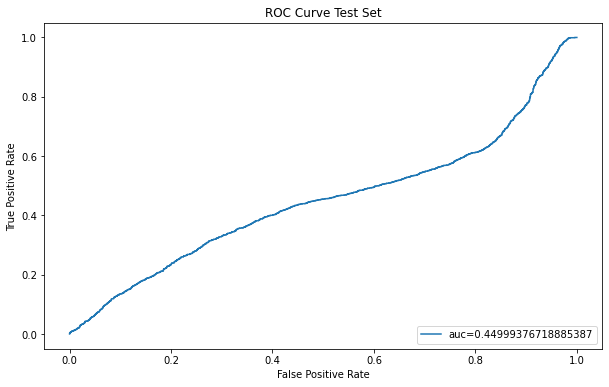

In [35]:
 # Initialize the model
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      6090
           1       0.71      0.73      0.72      6090

    accuracy                           0.72     12180
   macro avg       0.72      0.72      0.72     12180
weighted avg       0.72      0.72      0.72     12180

[[4247 1843]
 [1619 4471]]

Testing SET
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      2351
           1       0.51      0.51      0.51      2351

    accuracy                           0.51      4702
   macro avg       0.51      0.51      0.51      4702
weighted avg       0.51      0.51      0.51      4702

[[1190 1161]
 [1158 1193]]


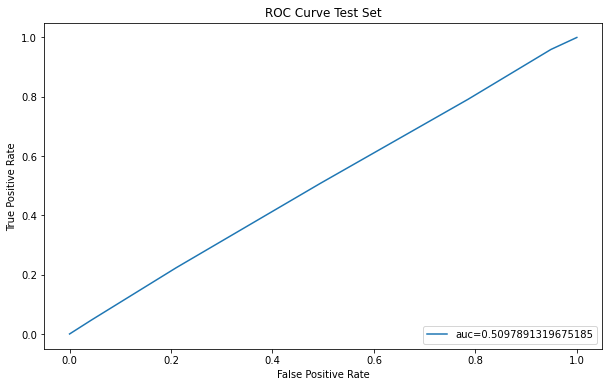

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn = evaluateModel(knn, X_train, y_train, X_test, y_test)

In [37]:
X_train = df_train.drop(["loan_status"], axis=1).values
y_train = df_train["loan_status"].values

X_test = df_test.drop(["loan_status"], axis=1).values
y_test = df_test["loan_status"].values

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6090
           1       1.00      1.00      1.00      6090

    accuracy                           1.00     12180
   macro avg       1.00      1.00      1.00     12180
weighted avg       1.00      1.00      1.00     12180

[[6090    0]
 [   0 6090]]

Testing SET
              precision    recall  f1-score   support

           0       0.70      0.46      0.55      2351
           1       0.60      0.80      0.68      2351

    accuracy                           0.63      4702
   macro avg       0.65      0.63      0.62      4702
weighted avg       0.65      0.63      0.62      4702

[[1078 1273]
 [ 464 1887]]


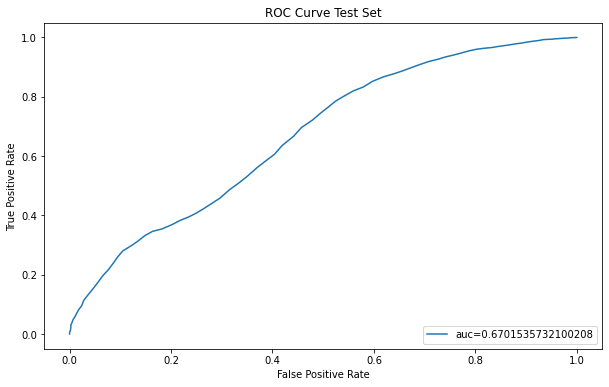

In [38]:
rf = RandomForestClassifier(random_state=42)
rf = evaluateModel(rf, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6090
           1       1.00      1.00      1.00      6090

    accuracy                           1.00     12180
   macro avg       1.00      1.00      1.00     12180
weighted avg       1.00      1.00      1.00     12180

[[6090    0]
 [   0 6090]]

Testing SET
              precision    recall  f1-score   support

           0       0.57      0.51      0.54      2351
           1       0.56      0.62      0.58      2351

    accuracy                           0.56      4702
   macro avg       0.56      0.56      0.56      4702
weighted avg       0.56      0.56      0.56      4702

[[1190 1161]
 [ 901 1450]]


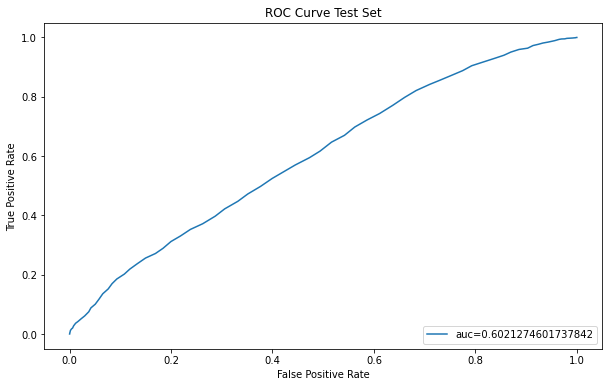

In [39]:
et = ExtraTreesClassifier(random_state=42)
et = evaluateModel(et, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      6090
           1       0.78      0.72      0.75      6090

    accuracy                           0.76     12180
   macro avg       0.76      0.76      0.76     12180
weighted avg       0.76      0.76      0.76     12180

[[4867 1223]
 [1680 4410]]

Testing SET
              precision    recall  f1-score   support

           0       0.59      0.69      0.63      2351
           1       0.62      0.52      0.56      2351

    accuracy                           0.60      4702
   macro avg       0.60      0.60      0.60      4702
weighted avg       0.60      0.60      0.60      4702

[[1611  740]
 [1137 1214]]


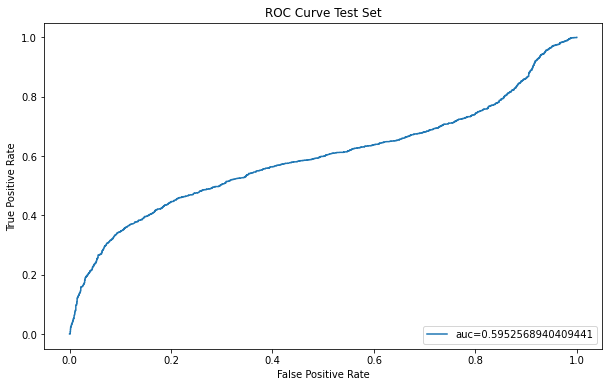

In [40]:
ada = AdaBoostClassifier(random_state=42)
ada = evaluateModel(ada, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      6090
           1       0.81      0.78      0.80      6090

    accuracy                           0.80     12180
   macro avg       0.80      0.80      0.80     12180
weighted avg       0.80      0.80      0.80     12180

[[4994 1096]
 [1315 4775]]

Testing SET
              precision    recall  f1-score   support

           0       0.74      0.57      0.64      2351
           1       0.65      0.81      0.72      2351

    accuracy                           0.69      4702
   macro avg       0.70      0.69      0.68      4702
weighted avg       0.70      0.69      0.68      4702

[[1333 1018]
 [ 458 1893]]


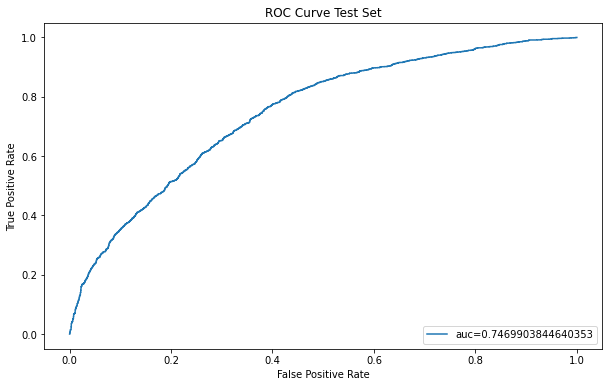

In [41]:
gb = GradientBoostingClassifier(random_state=42)
gb = evaluateModel(gb, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6090
           1       0.97      0.96      0.97      6090

    accuracy                           0.97     12180
   macro avg       0.97      0.97      0.97     12180
weighted avg       0.97      0.97      0.97     12180

[[5896  194]
 [ 218 5872]]

Testing SET
              precision    recall  f1-score   support

           0       0.63      0.48      0.55      2351
           1       0.58      0.72      0.64      2351

    accuracy                           0.60      4702
   macro avg       0.61      0.60      0.60      4702
weighted avg       0.61      0.60      0.60      4702

[[1136 1215]
 [ 662 1689]]


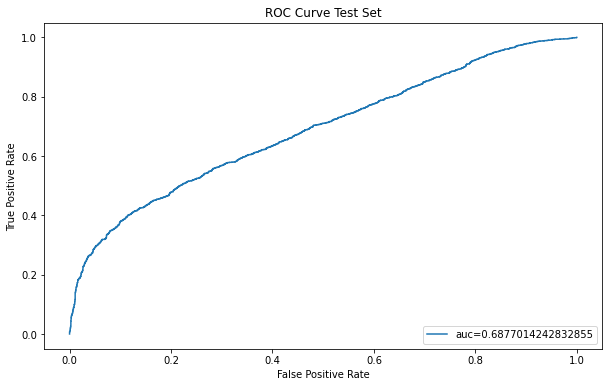

In [42]:
xgb = XGBClassifier(random_state=42)
xgb = evaluateModel(xgb, X_train, y_train, X_test, y_test)

In [43]:
# The RandomForest model did outcompete the linear model with 63% accuracy on the testing set and
# the linear model correctly predicted the outcome only 52%.

In [44]:
scaler1 = StandardScaler().fit(df_num)
df_scale1 = pd.DataFrame(scaler1.transform(df_num), columns=df_num.columns)
df_scale1.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,-0.393112,0.736585,-0.087609,0.790279,0.309615,-0.320026,-0.695401,0.376917,-0.351986,0.979339,...,-0.148869,1.326667,0.617581,0.500053,-0.351986,0.0,1.965731,1.010651,0.156409,2.188821
1,0.351681,-0.191716,-0.103427,0.196561,-0.473994,2.170653,-0.695401,0.539402,-0.351986,-0.354346,...,-0.148869,-1.188713,-1.069844,0.007255,-0.351986,0.0,-0.344265,-0.585044,-0.479179,-0.399905
2,0.254003,-0.320805,-0.204342,0.635913,-0.473157,-0.320026,-0.695401,-0.110538,-0.351986,-0.039187,...,-0.148869,-0.685637,-0.991097,0.007255,-0.351986,0.0,2.230882,0.875447,-0.214679,0.655196
3,-1.406519,-0.320805,-1.388060,-0.266539,-0.188665,-0.320026,-0.695401,-0.110538,2.682121,-0.388681,...,-0.148869,0.823591,0.617581,-0.482592,2.682121,0.0,-0.815953,-0.706007,-0.321269,-0.783830
4,1.230781,0.385387,1.857873,0.255933,0.216736,-0.320026,1.759668,0.051947,-0.351986,2.116088,...,-0.148869,-0.182561,0.617581,0.992851,-0.351986,0.0,0.438026,0.790900,2.031592,0.049082


In [45]:
df_clean_scale = pd.concat([df_scale1, df_oh, df_le], axis=1)
df_clean_scale.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag
0,-0.393112,0.736585,-0.087609,0.790279,0.309615,-0.320026,-0.695401,0.376917,-0.351986,0.979339,...,0,1,0,0,1,0,0,1,0,0
1,0.351681,-0.191716,-0.103427,0.196561,-0.473994,2.170653,-0.695401,0.539402,-0.351986,-0.354346,...,0,1,0,0,0,1,0,1,0,0
2,0.254003,-0.320805,-0.204342,0.635913,-0.473157,-0.320026,-0.695401,-0.110538,-0.351986,-0.039187,...,0,1,0,0,0,1,0,1,0,0
3,-1.406519,-0.320805,-1.388060,-0.266539,-0.188665,-0.320026,-0.695401,-0.110538,2.682121,-0.388681,...,0,0,0,1,1,0,0,1,0,0
4,1.230781,0.385387,1.857873,0.255933,0.216736,-0.320026,1.759668,0.051947,-0.351986,2.116088,...,0,1,0,0,0,1,0,1,0,0


In [46]:
df_train_scaled = pd.concat([df_scale1, df_oh, df_le], axis=1)
df_train_scaled["loan_status"] = train_df.loan_status
df_train_scaled["loan_status"] = [1 if x == "high_risk" else 0 for x in df_train_scaled.loan_status]
df_train_scaled.head()


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
0,-0.393112,0.736585,-0.087609,0.790279,0.309615,-0.320026,-0.695401,0.376917,-0.351986,0.979339,...,1,0,0,1,0,0,1,0,0,0
1,0.351681,-0.191716,-0.103427,0.196561,-0.473994,2.170653,-0.695401,0.539402,-0.351986,-0.354346,...,1,0,0,0,1,0,1,0,0,0
2,0.254003,-0.320805,-0.204342,0.635913,-0.473157,-0.320026,-0.695401,-0.110538,-0.351986,-0.039187,...,1,0,0,0,1,0,1,0,0,0
3,-1.406519,-0.320805,-1.388060,-0.266539,-0.188665,-0.320026,-0.695401,-0.110538,2.682121,-0.388681,...,0,0,1,1,0,0,1,0,0,0
4,1.230781,0.385387,1.857873,0.255933,0.216736,-0.320026,1.759668,0.051947,-0.351986,2.116088,...,1,0,0,0,1,0,1,0,0,0


In [47]:
df_train_scaled.drop(['num_bc_sats', 'dti', 'total_cu_tl', 'open_act_il',
       'num_bc_tl', 'num_rev_accts', 'num_sats', 'open_acc',
       'num_tl_90g_dpd_24m', 'delinq_amnt', 'acc_now_delinq', 'num_tl_30dpd',
       'annual_inc', 'chargeoff_within_12_mths', 'total_il_high_credit_limit',
       'total_bal_ex_mort', 'tot_coll_amt', 'pub_rec',
       'pub_rec_bankruptcies', 'total_acc', 'num_il_tl', 'recoveries',
       'collection_recovery_fee', 'policy_code', 'num_tl_120dpd_2m',
       'tax_liens'], axis=1, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 61 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            12180 non-null  float64
 1   int_rate                             12180 non-null  float64
 2   installment                          12180 non-null  float64
 3   delinq_2yrs                          12180 non-null  float64
 4   inq_last_6mths                       12180 non-null  float64
 5   revol_bal                            12180 non-null  float64
 6   out_prncp                            12180 non-null  float64
 7   out_prncp_inv                        12180 non-null  float64
 8   total_pymnt                          12180 non-null  float64
 9   total_pymnt_inv                      12180 non-null  float64
 10  total_rec_prncp                      12180 non-null  float64
 11  total_rec_int               

In [48]:
scaler2 = StandardScaler().fit(df_num_test)
df_scale2 = pd.DataFrame(scaler2.transform(df_num_test), columns=df_num_test.columns)
df_scale2.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,2.273948,-1.132822,1.061318,0.917459,-0.152842,-0.323913,0.331114,0.875022,-0.334196,-0.404119,...,-0.164647,-0.260036,0.299444,-0.976752,-0.334196,0.0,1.745527,0.146528,1.591187,0.887063
1,-1.085188,0.084801,-1.005468,-0.547639,-0.541770,2.829374,-0.778578,-0.779056,-0.334196,-0.768384,...,-0.164647,-0.748331,-3.604666,-0.976752,-0.334196,0.0,-0.843948,-0.705592,-0.892419,-0.646997
2,-1.322303,0.380140,-1.279777,-0.771713,-0.767660,-0.323913,-0.778578,-1.109872,-0.334196,-0.613757,...,-0.164647,-0.748331,0.589104,-0.976752,-0.334196,0.0,-0.904456,-0.782393,-0.841807,-0.821505
3,0.297986,0.084801,-0.085885,0.228001,-0.512943,-0.323913,1.440806,-0.944464,-0.334196,-0.259142,...,-0.164647,0.716553,0.589104,0.530853,-0.334196,0.0,-0.729246,-0.340046,-0.606823,-0.397149
4,-1.322303,-0.405702,-1.307061,-0.633822,-0.326276,-0.323913,2.550498,-1.109872,-0.334196,-0.362227,...,-0.164647,0.228259,0.589104,-0.222950,-0.334196,0.0,-0.784379,-0.544196,-0.346532,-0.619713


In [49]:
df_clean_scale_test = pd.concat([df_scale2, df_oh_test, df_le_test], axis=1)
df_clean_scale_test.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag
0,2.273948,-1.132822,1.061318,0.917459,-0.152842,-0.323913,0.331114,0.875022,-0.334196,-0.404119,...,0,1,0,0,1,0,0,1,0,0
1,-1.085188,0.084801,-1.005468,-0.547639,-0.541770,2.829374,-0.778578,-0.779056,-0.334196,-0.768384,...,0,0,0,1,1,0,0,1,0,0
2,-1.322303,0.380140,-1.279777,-0.771713,-0.767660,-0.323913,-0.778578,-1.109872,-0.334196,-0.613757,...,0,0,0,1,1,0,0,1,0,0
3,0.297986,0.084801,-0.085885,0.228001,-0.512943,-0.323913,1.440806,-0.944464,-0.334196,-0.259142,...,0,0,0,1,1,0,0,1,0,0
4,-1.322303,-0.405702,-1.307061,-0.633822,-0.326276,-0.323913,2.550498,-1.109872,-0.334196,-0.362227,...,0,0,0,1,1,0,0,1,0,0


In [50]:
df_test_scaled = pd.concat([df_scale2, df_oh_test, df_le_test], axis=1)
df_test_scaled["loan_status"] = test_df.loan_status
df_test_scaled["loan_status"] = [1 if x == "high_risk" else 0 for x in df_test_scaled.loan_status]
df_test_scaled.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
0,2.273948,-1.132822,1.061318,0.917459,-0.152842,-0.323913,0.331114,0.875022,-0.334196,-0.404119,...,1,0,0,1,0,0,1,0,0,0
1,-1.085188,0.084801,-1.005468,-0.547639,-0.541770,2.829374,-0.778578,-0.779056,-0.334196,-0.768384,...,0,0,1,1,0,0,1,0,0,0
2,-1.322303,0.380140,-1.279777,-0.771713,-0.767660,-0.323913,-0.778578,-1.109872,-0.334196,-0.613757,...,0,0,1,1,0,0,1,0,0,0
3,0.297986,0.084801,-0.085885,0.228001,-0.512943,-0.323913,1.440806,-0.944464,-0.334196,-0.259142,...,0,0,1,1,0,0,1,0,0,0
4,-1.322303,-0.405702,-1.307061,-0.633822,-0.326276,-0.323913,2.550498,-1.109872,-0.334196,-0.362227,...,0,0,1,1,0,0,1,0,0,0


In [51]:
df_test_scaled.drop(['num_bc_sats', 'dti', 'total_cu_tl', 'open_act_il',
       'num_bc_tl', 'num_rev_accts', 'num_sats', 'open_acc',
       'num_tl_90g_dpd_24m', 'delinq_amnt', 'acc_now_delinq', 'num_tl_30dpd',
       'annual_inc', 'chargeoff_within_12_mths', 'total_il_high_credit_limit',
       'total_bal_ex_mort', 'tot_coll_amt', 'pub_rec',
       'pub_rec_bankruptcies', 'total_acc', 'num_il_tl', 'recoveries',
       'collection_recovery_fee', 'policy_code', 'num_tl_120dpd_2m',
       'tax_liens'], axis=1, inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4702 entries, 0 to 4701
Data columns (total 61 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            4702 non-null   float64
 1   int_rate                             4702 non-null   float64
 2   installment                          4702 non-null   float64
 3   delinq_2yrs                          4702 non-null   float64
 4   inq_last_6mths                       4702 non-null   float64
 5   revol_bal                            4702 non-null   float64
 6   out_prncp                            4702 non-null   float64
 7   out_prncp_inv                        4702 non-null   float64
 8   total_pymnt                          4702 non-null   float64
 9   total_pymnt_inv                      4702 non-null   float64
 10  total_rec_prncp                      4702 non-null   float64
 11  total_rec_int                 

In [52]:
# My prediction for the scaled data models is that the linear and RandomForest models will end up 
# with very similar results. Scaling the data will help the accuracy of the linear model more so
# than for the RandomForest model, but I'm not sure if it will affect it to point of reaching the
# accuracy of the RandomForest model.

In [53]:
X_train = df_train_scaled.drop(["loan_status", "home_ownership_ANY", "verification_status_Not Verified"], axis=1).values
y_train = df_train_scaled["loan_status"].values

X_test = df_test_scaled.drop(["loan_status", "home_ownership_ANY", "verification_status_Not Verified"], axis=1).values
y_test = df_test_scaled["loan_status"].values

In [54]:
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    print(conf_matrix_test)
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TRAINING SET
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      6090
           1       0.73      0.66      0.69      6090

    accuracy                           0.71     12180
   macro avg       0.71      0.71      0.70     12180
weighted avg       0.71      0.71      0.70     12180

[[4590 1500]
 [2085 4005]]

Testing SET
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      2351
           1       0.66      0.68      0.67      2351

    accuracy                           0.67      4702
   macro avg       0.67      0.67      0.67      4702
weighted avg       0.67      0.67      0.67      4702

[[1526  825]
 [ 745 1606]]


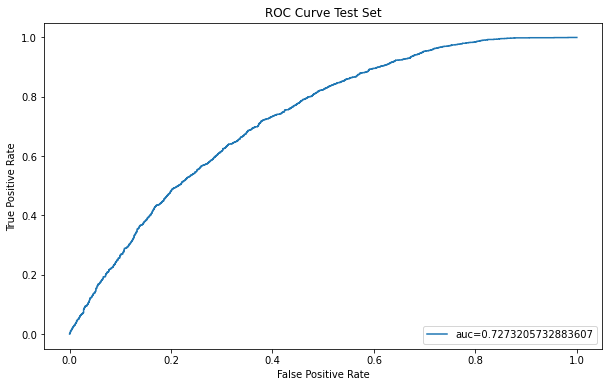

In [55]:
 # Initialize the model
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.74      0.77      0.75      6090
           1       0.76      0.72      0.74      6090

    accuracy                           0.75     12180
   macro avg       0.75      0.75      0.75     12180
weighted avg       0.75      0.75      0.75     12180

[[4699 1391]
 [1678 4412]]

Testing SET
              precision    recall  f1-score   support

           0       0.59      0.56      0.58      2351
           1       0.58      0.62      0.60      2351

    accuracy                           0.59      4702
   macro avg       0.59      0.59      0.59      4702
weighted avg       0.59      0.59      0.59      4702

[[1318 1033]
 [ 902 1449]]


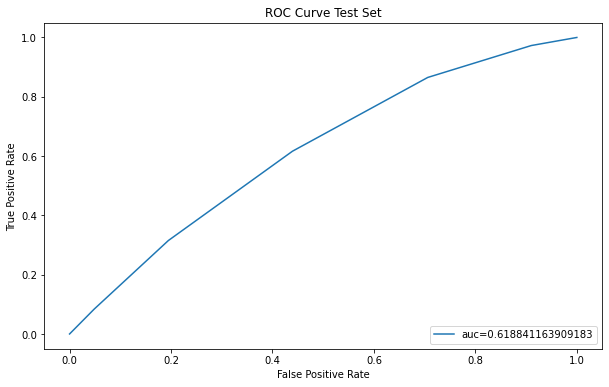

In [56]:
knn = KNeighborsClassifier(n_neighbors=5)
knn = evaluateModel(knn, X_train, y_train, X_test, y_test)

In [57]:
X_train = df_train_scaled.drop(["loan_status"], axis=1).values
y_train = df_train_scaled["loan_status"].values

X_test = df_test_scaled.drop(["loan_status"], axis=1).values
y_test = df_test_scaled["loan_status"].values

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6090
           1       1.00      1.00      1.00      6090

    accuracy                           1.00     12180
   macro avg       1.00      1.00      1.00     12180
weighted avg       1.00      1.00      1.00     12180

[[6090    0]
 [   0 6090]]

Testing SET
              precision    recall  f1-score   support

           0       0.74      0.21      0.32      2351
           1       0.54      0.93      0.68      2351

    accuracy                           0.57      4702
   macro avg       0.64      0.57      0.50      4702
weighted avg       0.64      0.57      0.50      4702

[[ 485 1866]
 [ 169 2182]]


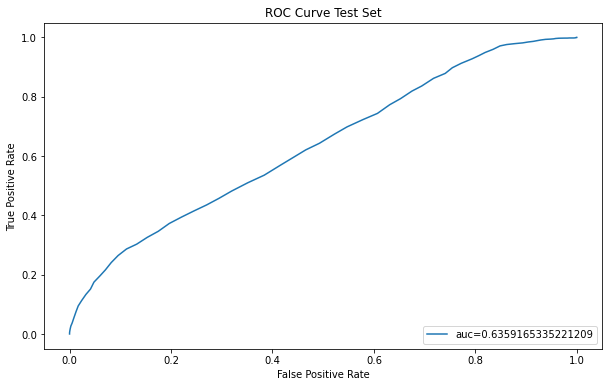

In [58]:
rf = RandomForestClassifier(random_state=42)
rf = evaluateModel(rf, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6090
           1       1.00      1.00      1.00      6090

    accuracy                           1.00     12180
   macro avg       1.00      1.00      1.00     12180
weighted avg       1.00      1.00      1.00     12180

[[6090    0]
 [   0 6090]]

Testing SET
              precision    recall  f1-score   support

           0       0.64      0.46      0.53      2351
           1       0.58      0.74      0.65      2351

    accuracy                           0.60      4702
   macro avg       0.61      0.60      0.59      4702
weighted avg       0.61      0.60      0.59      4702

[[1076 1275]
 [ 610 1741]]


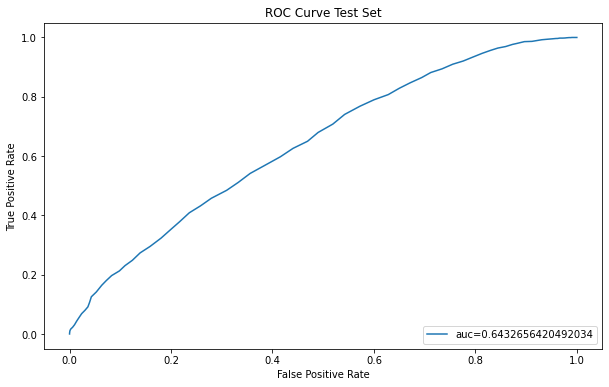

In [59]:
et = ExtraTreesClassifier(random_state=42)
et = evaluateModel(et, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      6090
           1       0.78      0.72      0.75      6090

    accuracy                           0.76     12180
   macro avg       0.76      0.76      0.76     12180
weighted avg       0.76      0.76      0.76     12180

[[4867 1223]
 [1680 4410]]

Testing SET
              precision    recall  f1-score   support

           0       0.77      0.06      0.11      2351
           1       0.51      0.98      0.67      2351

    accuracy                           0.52      4702
   macro avg       0.64      0.52      0.39      4702
weighted avg       0.64      0.52      0.39      4702

[[ 137 2214]
 [  40 2311]]


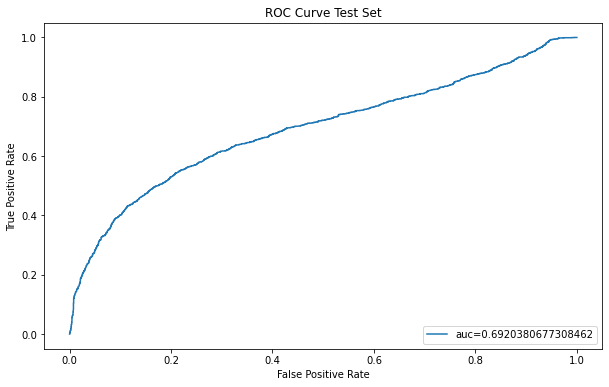

In [60]:
ada = AdaBoostClassifier(random_state=42)
ada = evaluateModel(ada, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      6090
           1       0.81      0.78      0.80      6090

    accuracy                           0.80     12180
   macro avg       0.80      0.80      0.80     12180
weighted avg       0.80      0.80      0.80     12180

[[4994 1096]
 [1315 4775]]

Testing SET
              precision    recall  f1-score   support

           0       0.72      0.11      0.18      2351
           1       0.52      0.96      0.67      2351

    accuracy                           0.53      4702
   macro avg       0.62      0.53      0.43      4702
weighted avg       0.62      0.53      0.43      4702

[[ 248 2103]
 [  95 2256]]


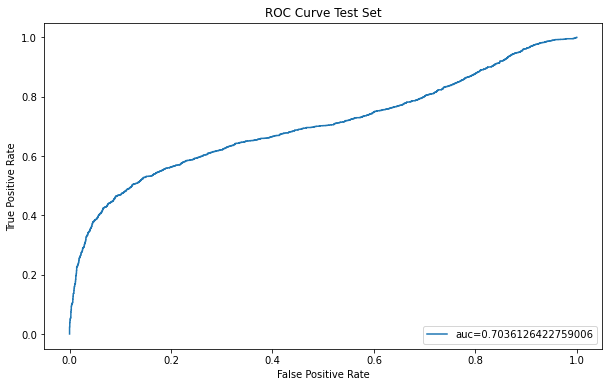

In [61]:
gb = GradientBoostingClassifier(random_state=42)
gb = evaluateModel(gb, X_train, y_train, X_test, y_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6090
           1       0.97      0.96      0.97      6090

    accuracy                           0.97     12180
   macro avg       0.97      0.97      0.97     12180
weighted avg       0.97      0.97      0.97     12180

[[5896  194]
 [ 218 5872]]

Testing SET
              precision    recall  f1-score   support

           0       0.58      0.08      0.14      2351
           1       0.51      0.94      0.66      2351

    accuracy                           0.51      4702
   macro avg       0.54      0.51      0.40      4702
weighted avg       0.54      0.51      0.40      4702

[[ 188 2163]
 [ 138 2213]]


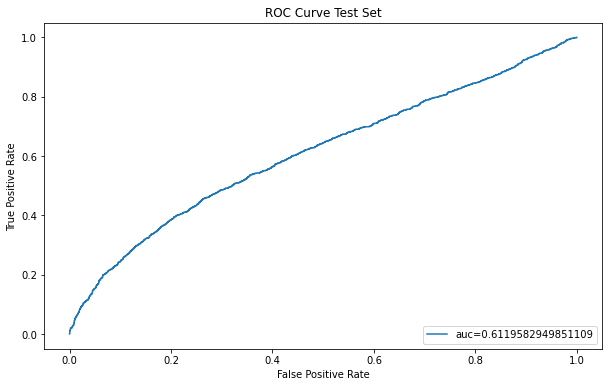

In [62]:
xgb = XGBClassifier(random_state=42)
xgb = evaluateModel(xgb, X_train, y_train, X_test, y_test)

In [63]:
# The linear model clearly outperformed the RandomForest model when the data was scaled. The linear
# model went from 52 percent accuracy to 67 percent on the test data, while the RandomForest model
# suffered from the data being scaled dropping to 57 percent from 63.